(-0.5, 511.5, 511.5, -0.5)

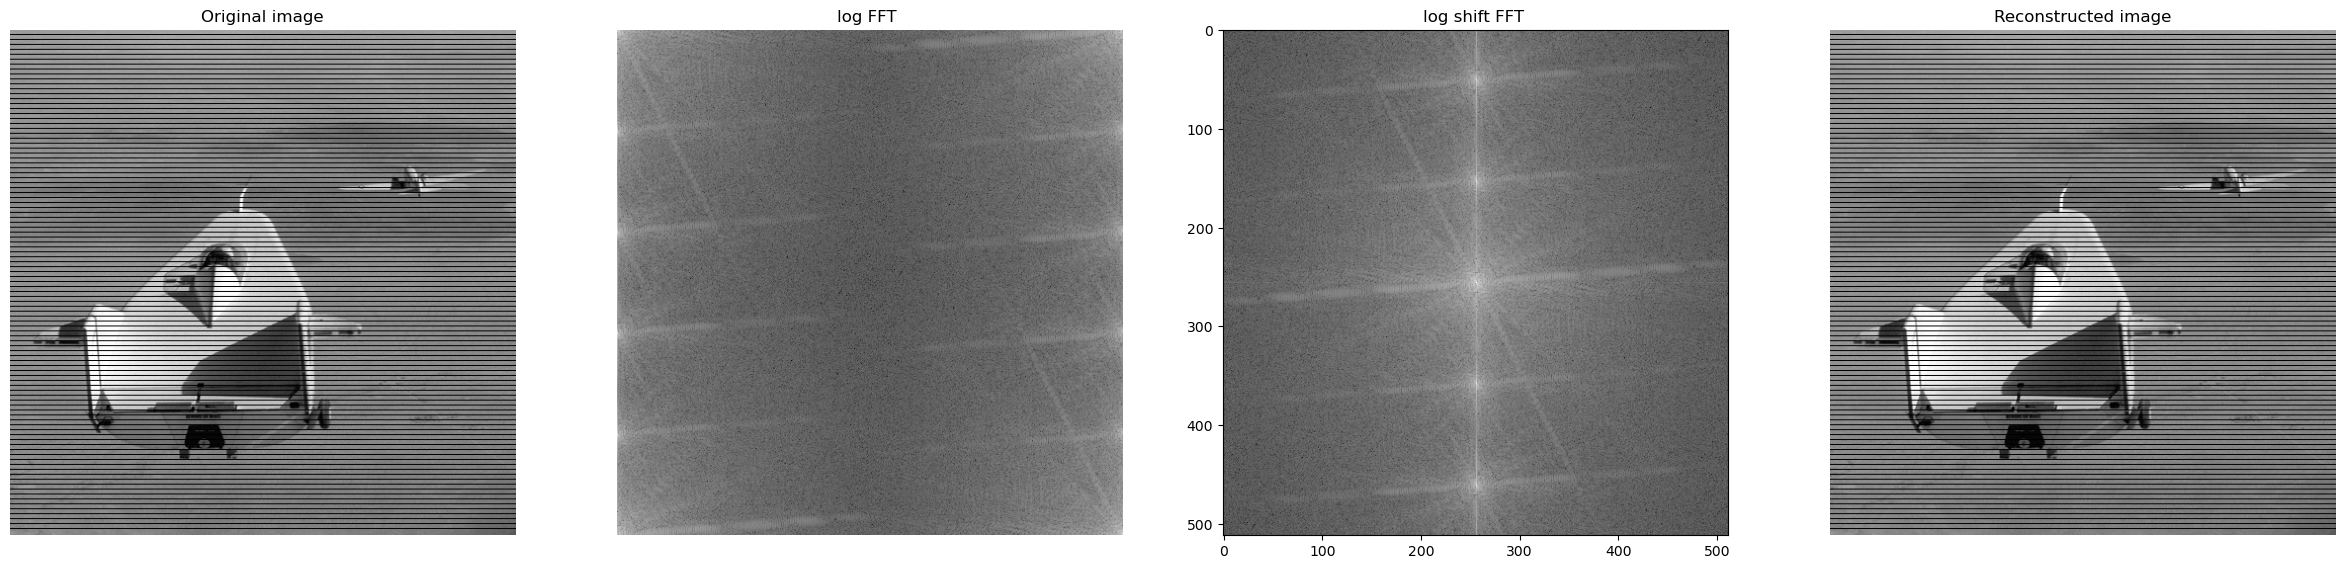

In [8]:
from scipy import ndimage
from scipy import misc
import matplotlib.pyplot as plt
import numpy as np
import os
import skimage.io as io
from skimage.transform import resize
import cmath
import math
import cv2
from skimage.morphology import square

IMDIR = "./plane.png/"

im = io.imread(IMDIR,as_gray=True)
#im = resize(im,(100,100),mode='constant') # RESIZE IF TOO SLOW 
imfft=np.fft.fft2(im)
imfftangle=np.angle(imfft)
imfftabs=np.abs(imfft)
imfftlog=np.log(imfftabs)
imfftlogshift=np.fft.fftshift(imfftlog)
imIfftlog=np.fft.ifftshift(imfftlogshift)
imIfftabs=np.exp(imIfftlog)
imIfft=imIfftabs*np.exp(1j*imfftangle)
iminverse=np.real((np.fft.ifft2((imIfft))))
iminverse=iminverse/np.max(iminverse)

plt.figure(1,figsize=(30,30))

plt.subplot(141)
plt.title('Original image')
plt.imshow(im)
plt.gray()
plt.axis('off')

            
plt.subplot(142)
plt.title('log FFT ')
plt.imshow(imfftlog)
plt.gray()
plt.axis('off')
                        
plt.subplot(143)
plt.title('log shift FFT ')
plt.imshow(imfftlogshift)
plt.gray()


            
plt.subplot(144)
plt.title('Reconstructed image')
plt.imshow(iminverse)
plt.gray()
plt.axis('off')


In [2]:
def notchfilter(filtype,shape,points,cutoff):
    if filtype=='ideal':
        m = shape[0]
        n = shape[1]
        TF = np.ones(shape,dtype=np.bool)
        center = np.array(TF.shape)/2.0
        for iy in range(m):
            for ix in range(n):
                for d in range(points.shape[0]):
                    u0 = points[d,0]
                    v0 = points[d,1]
                    u0,v0=v0,u0
                    d1 = math.sqrt((iy -center[0]- u0)**2 + (ix -center[1]- v0)**2)
                    d2 = math.sqrt((iy-center[0] + u0)**2 + (ix -center[1]+ v0)**2)
                    if d1 <= cutoff or d2 <= cutoff:
                        TF[iy,ix] *= 0.0
    elif filtype=='gaussian':
        m = shape[0]
        n = shape[1]
        TF = np.ones(shape)
        center = np.array(TF.shape)/2.0
        for iy in range(m):
            for ix in range(n):
                for d in range(points.shape[0]):
                    u0 = points[d,0]
                    v0 = points[d,1]
                    u0,v0=v0,u0
                    d1 = math.sqrt((iy -center[0]- u0)**2 + (ix -center[1]- v0)**2)
                    d2 = math.sqrt((iy -center[0]+ u0)**2 + (ix -center[1]+ v0)**2)
                    TF[iy,ix]*= (1-math.exp(-d1**2/(2*cutoff**2)))* (1-math.exp(-d2**2/(2*cutoff**2)))
    return TF


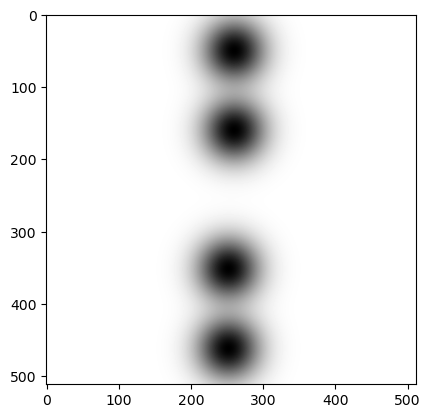

In [3]:
shape=im.shape;
cutoff=30;
points=np.array([[260,50],[260,160]])
center = np.array(shape)/2.0
points[0,:]=points[0,:]-center[0]
points[1,:]=points[1,:]-center[1]
plt.figure(1)
plt.imshow(notchfilter('gaussian',shape,points,cutoff))
plt.gray()


In [4]:
TF=notchfilter('ideal',shape,points,cutoff)
imfft=np.fft.fft2(im);
imfft=np.fft.fftshift(imfft);
imfil=imfft*TF
imfil=np.fft.ifftshift(imfil)
res=np.real(np.fft.ifft2(imfil))
#res1=res[im.shape[0]//2:3*im.shape[0]//2,im.shape[1]//2:3*im.shape[1]//2]

/var/folders/1k/cmk35y7911n38zl4v6tb_4qr0000gn/T/ipykernel_836/499116985.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  TF = np.ones(shape,dtype=np.bool)


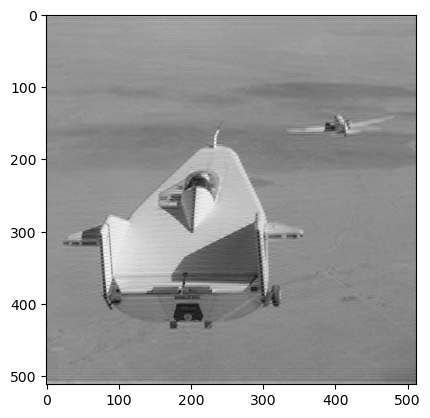

In [5]:
plt.figure(3)
plt.imshow(res,cmap='gray')

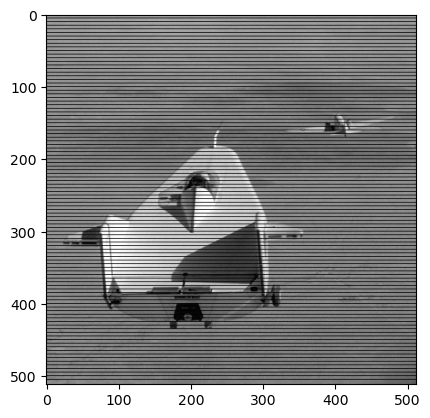

In [6]:
plt.imshow(im,cmap='gray')

Question 2 

In [3]:
IMDIR = "./card.png"

im = cv2.imread(IMDIR)

res=cv2.medianBlur(im,5)

cv2.imshow('result',res)

cv2.imwrite('./card_res.png',res)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
IMDIR = "./card.png"

im = cv2.imread(IMDIR)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:

gray_card = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_card,cmap='gray')


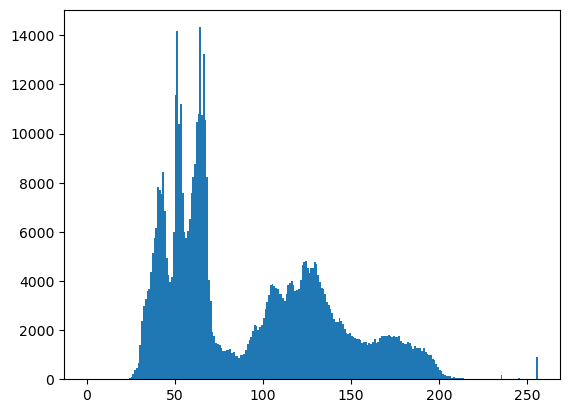

In [5]:
plt.hist(gray_card.ravel(),256,[0,256]); plt.show()

In [41]:
ret2,th2 = cv2.threshold(gray_card,120,255,cv2.THRESH_BINARY)

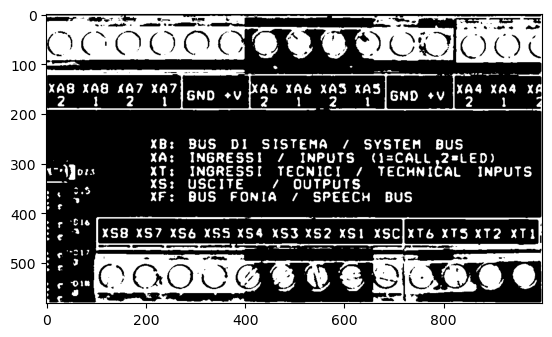

In [42]:
plt.imshow(th2)

In [57]:

closing_card = cv2.morphologyEx(th2, cv2.MORPH_CLOSE, square(6))

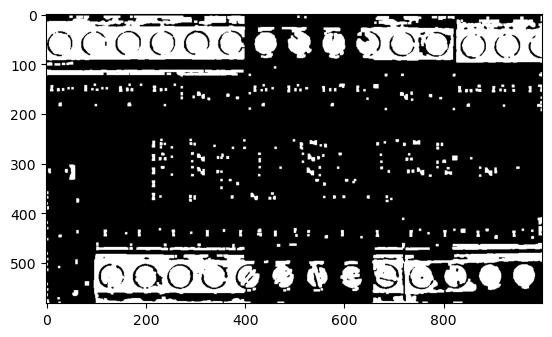

In [58]:
plt.imshow(opening_card)

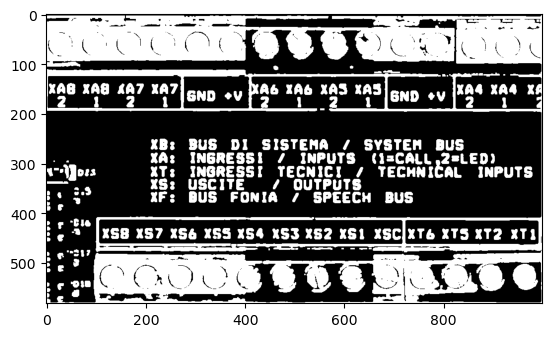

In [68]:
dilation_card = cv2.dilate(th2,square(2),iterations = 2)
plt.imshow(dilation)

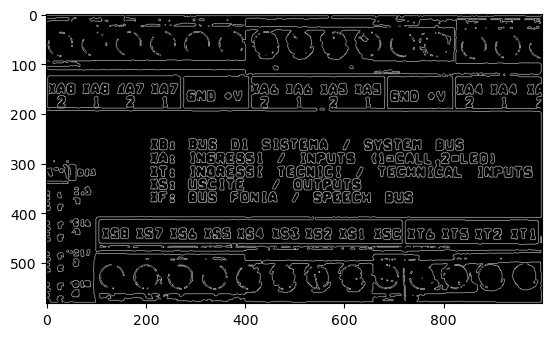

In [76]:
edges = cv2.Canny(dilation_card,0,1)
plt.imshow(edges,cmap='gray')

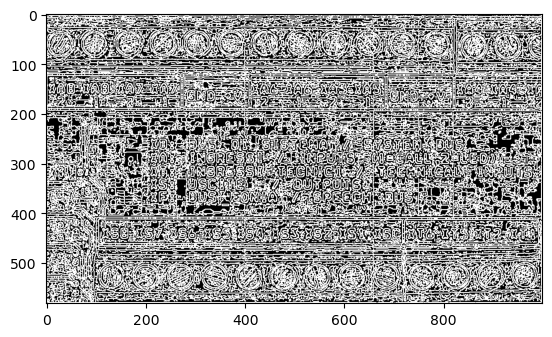

In [12]:
edges = cv2.Canny(res,0,1)

opening = cv2.morphologyEx(edges, cv2.MORPH_GRADIENT, square(2))
plt.imshow(opening,cmap='gray')

In [ ]:
image = cv2.imread("./flag.png")
hsv=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)

# Define lower and uppper limits of what we call "brown"
red_hi=np.array([10,255,255])
red_lo=np.array([0,50,50])

yellow_hi=np.array([45, 255, 255])
yellow_lo=np.array([22, 93, 0])

black_hi=np.array([180, 255, 30])
black_lo=np.array([0, 0, 0])





# Mask image to only select
mask_red=cv2.inRange(hsv,red_lo,red_hi)
mask_yellow=cv2.inRange(hsv,yellow_lo,yellow_hi)
mask_black=cv2.inRange(hsv,black_lo,black_hi)

# Change image to red where we found brown
image[mask_red>0]=(34,139,34)
image[mask_black>0]=(0, 165, 255)
image[mask_yellow>0]=(0,0,255)
cv2.imshow('test',image)
cv2.imwrite("result.png",image)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [62]:
black=image[20,image.shape[1]//3,:]
red=image[20,(2*image.shape[1]//3)-10,:]
yellow=image[20,(2*image.shape[1]//3)+10,:]

print(red)


[0 0 0]


In [56]:
image[image==red]=[0,255,0]
image[image==black]=[255,255,0]
image[image==yellow]=[0,0,255]

ValueError: NumPy boolean array indexing assignment cannot assign 3 input values to the 274560 output values where the mask is true

In [63]:
print(image[1,2,:]==red)

[ True  True  True]
